In [2]:
import pandas as pd
import transformers
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import pickle

/Users/annikamollerchandiramani/Documents/GitHub/visual_analytics/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ratings = pd.read_csv("../data/ml-32m/ratings.csv")
tags = pd.read_csv("../data/ml-32m/tags.csv")
movies = pd.read_csv("../data/ml-32m/movies.csv")
links = pd.read_csv("../data/ml-32m/links.csv")

In [ ]:
OMDB_API_KEY = "b0b2b06c"
links = pd.read_csv("../data/links.csv")

In [5]:
# import pandas as pd
# import requests
# import time
# import csv
# import os

# OMDB_API_KEY = "b0b2b06c"
# OUTPUT_FILE = "omdb_data.csv"
# FAILED_FILE = "omdb_failed.txt"
# MAX_RETRIES = 3

# # Predefined OMDb fields (as many as known)
# OMDB_FIELDS = [
#     'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
#     'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
#     'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
#     'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons',
#     'Season', 'Episode', 'seriesID'
# ]
# # Add movieId from the links.csv
# OMDB_FIELDS.append('movieId')

# # Load links.csv and create IMDb IDs
# links = pd.read_csv("../data/links.csv")
# links['imdb_id'] = links['imdbId'].apply(lambda x: f"tt{int(x):07d}")

# # Already written and failed
# written_ids = set()
# if os.path.exists(OUTPUT_FILE):
#     with open(OUTPUT_FILE, newline='', encoding='utf-8') as f:
#         reader = csv.DictReader(f)
#         for row in reader:
#             if 'imdbID' in row:
#                 written_ids.add(row['imdbID'])

# failed_ids = set()
# if os.path.exists(FAILED_FILE):
#     with open(FAILED_FILE, 'r') as f:
#         failed_ids = set(line.strip() for line in f)

# def fetch_omdb_data(imdb_id):
#     for attempt in range(MAX_RETRIES):
#         try:
#             url = f"http://www.omdbapi.com/?i={imdb_id}&apikey={OMDB_API_KEY}"
#             response = requests.get(url, timeout=5)
#             if response.status_code == 200:
#                 data = response.json()
#                 if data.get("Response") == "True":
#                     return data
#                 else:
#                     print(f"OMDb error for {imdb_id}: {data.get('Error')}")
#                     return None
#         except Exception as e:
#             print(f"Request error for {imdb_id} (attempt {attempt+1}): {e}")
#         time.sleep(2 ** attempt)
#     return None

# # Write header if needed
# file_exists = os.path.exists(OUTPUT_FILE)
# with open(OUTPUT_FILE, mode='a', encoding='utf-8', newline='') as out_f, \
#      open(FAILED_FILE, mode='a', encoding='utf-8') as fail_f:

#     writer = csv.DictWriter(out_f, fieldnames=OMDB_FIELDS, extrasaction='ignore')
#     if not file_exists:
#         writer.writeheader()

#     for i, row in links.iterrows():
#         imdb_id = row['imdb_id']
#         movie_id = row['movieId']

#         if imdb_id in written_ids or imdb_id in failed_ids:
#             continue

#         print(f"[{i+1}/{len(links)}] Fetching {imdb_id}...")

#         data = fetch_omdb_data(imdb_id)
#         if data:
#             data['movieId'] = movie_id
#             writer.writerow(data)
#             out_f.flush()
#         else:
#             print(f"Logging failed IMDb ID: {imdb_id}")
#             fail_f.write(f"{imdb_id}\n")
#             fail_f.flush()

#         time.sleep(0.2)


[1/87585] Fetching tt0114709...
[2/87585] Fetching tt0113497...
[3/87585] Fetching tt0113228...
[4/87585] Fetching tt0114885...
[5/87585] Fetching tt0113041...
[6/87585] Fetching tt0113277...
[7/87585] Fetching tt0114319...
[8/87585] Fetching tt0112302...
[9/87585] Fetching tt0114576...
[10/87585] Fetching tt0113189...
[11/87585] Fetching tt0112346...
[12/87585] Fetching tt0112896...
[13/87585] Fetching tt0112453...
[14/87585] Fetching tt0113987...
[15/87585] Fetching tt0112760...
[16/87585] Fetching tt0112641...
[17/87585] Fetching tt0114388...
[18/87585] Fetching tt0113101...
[19/87585] Fetching tt0112281...
[20/87585] Fetching tt0113845...
[21/87585] Fetching tt0113161...
[22/87585] Fetching tt0112722...
[23/87585] Fetching tt0112401...
[24/87585] Fetching tt0114168...
[25/87585] Fetching tt0113627...
[26/87585] Fetching tt0114057...
[27/87585] Fetching tt0114011...
[28/87585] Fetching tt0114117...
[29/87585] Fetching tt0112682...
[30/87585] Fetching tt0115012...
[31/87585] Fetching

In [4]:
omdb_data = pd.read_csv("../data/omdb_data.csv")
omdb_data.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbId', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'totalSeasons',
       'Season', 'Episode', 'seriesID', 'movieId'],
      dtype='object')

In [5]:
ml1m = pd.read_csv('../data/ml-1m/movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'],
    encoding='latin-1')
ml1m.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [6]:
ratings = pd.read_csv('../data/ml-1m/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='latin-1')
ratings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [7]:
users = pd.read_csv('../data/ml-1m/users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='latin-1')
users.head()

UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

In [8]:
def row_to_description(row):
    return (
        f"{row['Title_y']} ({row['Year']}) is a {row['Genre']} movie "
        f"rated {row['Rated']} with an IMDb rating of {row['imdbRating']}. "
        f"It grossed ${row['BoxOffice']} and was released in {row['Country']}. "
        f"Awards: {row['Awards']}."
    )

In [15]:
# import pandas as pd

# # Load MovieLens 1M
# ml1m = pd.read_csv('../data/ml-1m/movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'],
#     encoding='latin-1')

# # Extract title and year
# ml1m['Year'] = ml1m['Title'].str.extract(r'\((\d{4})\)')
# ml1m['CleanTitle'] = ml1m['Title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip().str.lower()

# # Load MovieLens 32M/25M movies.csv
# ml32m_movies = pd.read_csv('../data/ml-32m/movies.csv')  # From MovieLens 32M or 25M
# ml32m_links = pd.read_csv('../data/ml-32m/links.csv')  # From MovieLens 32M or 25M

# # Merge to attach imdbId and tmdbId to 32M movies
# ml32m = pd.merge(ml32m_movies, ml32m_links, on='movieId', how='left')

# # Extract year and clean title from 32M
# ml32m['Year'] = ml32m['title'].str.extract(r'\((\d{4})\)')
# ml32m['CleanTitle'] = ml32m['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip().str.lower()
# ml32m['imdbId'] = ml32m['imdbId'].astype(float).astype(int).astype(str).str.zfill(7)
# ml32m['imdbId'] = 'tt' + ml32m['imdbId']

# merged = pd.merge(ml1m, ml32m, how='left', left_on=['CleanTitle', 'Year'], right_on=['CleanTitle', 'Year'])

# # Final dataframe with IMDb & TMDb IDs
# result = merged[['MovieID', 'Title', 'Genres', 'imdbId', 'tmdbId']]
# merged_df = pd.merge(result, omdb_data, on ='imdbId')
# merged_df = merged_df.drop(['Production', 'Website', 'Response', 'totalSeasons', 'Season', 'Episode', 'seriesID', 'DVD', 'Genres', 'movieId'], axis=1)
# merged_df['description'] = merged_df.apply(row_to_description, axis=1)

# # Rows where no match was found — imdbId is NaN
# unmatched = merged[merged['imdbId'].isna()]

# # View the first few rows
# print(unmatched[['MovieID', 'Title', 'Year', 'CleanTitle']].head())

# print(f"Unmatched rows: {unmatched.shape[0]}")
# print(f"Total rows: {merged.shape[0]}")
# print(f"Match rate: {(1 - unmatched.shape[0] / merged.shape[0]) * 100:.2f}%")

    MovieID                                        Title  Year  \
28       29            City of Lost Children, The (1995)  1995   
31       32                        Twelve Monkeys (1995)  1995   
46       47                         Seven (Se7en) (1995)  1995   
57       58             Postino, Il (The Postman) (1994)  1994   
58       59  Confessional, The (Le Confessionnal) (1995)  1995   

                              CleanTitle  
28            city of lost children, the  
31                        twelve monkeys  
46                         seven (se7en)  
57             postino, il (the postman)  
58  confessional, the (le confessionnal)  
Unmatched rows: 504
Total rows: 3888
Match rate: 87.04%


In [9]:
merged_df = pd.read_csv("../data/movielens_omdb_with_description.csv")

In [36]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small & fast

embeddings = model.encode(merged_df['description'], show_progress_bar=True)

Batches: 100%|██████████| 106/106 [00:07<00:00, 13.59it/s]


In [45]:
# Assuming embeddings is a numpy array of shape (n_samples, embedding_dim)
embedding_dim = embeddings.shape[1]
for i in range(embedding_dim):
    merged_df[f'embedding_{i}'] = embeddings[:, i]

# Save full DataFrame (including embeddings)
merged_df.to_csv("data_with_embeddings.csv", index=False)

/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_14980/2075729305.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[f'embedding_{i}'] = embeddings[:, i]
/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_14980/2075729305.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[f'embedding_{i}'] = embeddings[:, i]
/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_14980/2075729305.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [39]:
# Example: save a DataFrame `df`
with open('embeddings.pkl', 'wb') as f:
    pickle.dump(embeddings, f)

In [48]:
df = pd.read_csv("../data/data_with_embeddings.csv")
df['embeddings']

IndexError: index 100 is out of bounds for axis 0 with size 100

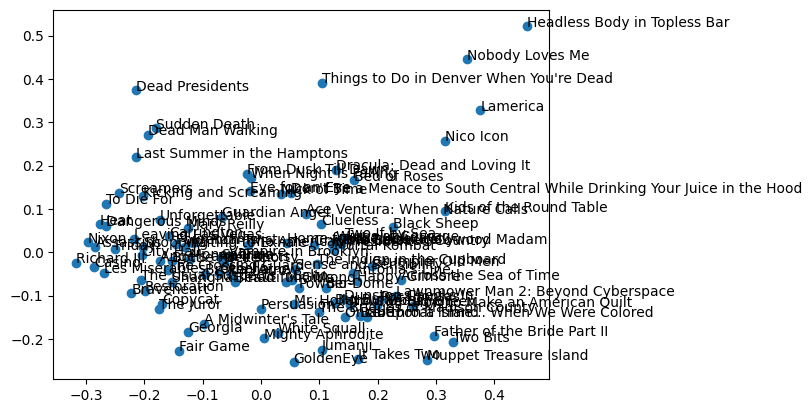

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.scatter(reduced[:, 0], reduced[:, 1])
for i, title in enumerate(merged_df["Title_y"]):
    plt.annotate(title, (reduced[i, 0], reduced[i, 1]))
plt.title("Movie Embeddings PCA")
plt.show()

In [44]:
reduced[:, 0]

array([ 0.10453062,  0.19075848, -0.12964572,  0.2958751 , -0.27593678,
       -0.0684889 ,  0.13748488, -0.17985779,  0.05585896, -0.02151978,
        0.12898423,  0.0539123 , -0.2963232 ,  0.18191732, -0.28654101,
        0.05773827, -0.14496678,  0.07721647, -0.12123647, -0.06354865,
       -0.1692688 , -0.28365284,  0.06481001, -0.21751334, -0.07153221,
        0.15271617, -0.00078375, -0.15304455, -0.2657651 ,  0.12779355,
        0.16895297, -0.1569971 , -0.19295661,  0.24080288,  0.16629979,
        0.10266382,  0.09018326, -0.31724283, -0.21340516, -0.1987844 ,
        0.12574528, -0.2650101 ,  0.2598159 ,  0.20459436, -0.01642013,
       -0.2064829 , -0.06598271,  0.00575838,  0.37625107,  0.1984165 ,
       -0.12439759,  0.3152581 ,  0.04508273,  0.09577632, -0.01897512,
        0.05590332,  0.05188299,  0.14396432,  0.1116052 ,  0.2317112 ,
        0.32865134, -0.1166527 , -0.25034583, -0.02473081, -0.13985659,
       -0.20162298, -0.26976174,  0.15992555,  0.12760785, -0.24

In [10]:
merged_df = pd.read_csv("../data/movielens_omdb_with_description.csv")

with open("../data/embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)
    
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

NameError: name 'PCA' is not defined

In [52]:
merged_df['pca_x'] = reduced[:, 0]
merged_df['pca_y'] = reduced[:, 1]

In [17]:
merged_df.columns

Index(['MovieID', 'Title_x', 'imdbId', 'tmdbId', 'Title_y', 'Year', 'Rated',
       'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
       'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore',
       'imdbRating', 'imdbVotes', 'Type', 'BoxOffice', 'description'],
      dtype='object')

In [15]:
# Assume your DataFrame is called df and the column is 'Genres'
genre_series = merged_df['Genre'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])

# Flatten the list of lists into a single list
all_genres = [genre for sublist in genre_series for genre in sublist]

# Get unique genres as a set, then convert to a sorted list if needed
unique_genres = sorted(set(all_genres))

In [18]:
import pandas as pd

# Assuming df has columns: 'Year', 'Genre'
df_stream = merged_df.copy()

# Explode genres into separate rows
df_stream["GenreList"] = df_stream["Genre"].str.split(", ")
df_stream = df_stream.explode("GenreList")

# Group by year and genre to count movies
genre_year_counts = (
    df_stream.groupby(["Year", "GenreList"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Year", "GenreList"])
)

# Pivot for streamgraph
genre_pivot = genre_year_counts.pivot(index="Year", columns="GenreList", values="Count").fillna(0)

In [19]:
genre_pivot

GenreList  Action  Adventure  Animation  Biography  Comedy  Crime  \
Year                                                                
1919          0.0        1.0        0.0        0.0     1.0    0.0   
1920          0.0        0.0        0.0        0.0     1.0    0.0   
1921          0.0        0.0        0.0        0.0     1.0    0.0   
1922          0.0        0.0        0.0        0.0     0.0    0.0   
1923          0.0        0.0        0.0        0.0     0.0    0.0   
...           ...        ...        ...        ...     ...    ...   
1996         36.0       32.0        6.0       12.0   137.0   52.0   
1997         54.0       34.0        4.0       11.0   113.0   59.0   
1998         45.0       29.0        7.0       17.0   131.0   61.0   
1999         33.0       28.0        8.0       14.0   117.0   38.0   
2000         25.0       21.0        6.0        9.0    73.0   32.0   

GenreList  Documentary  Drama  Family  Fantasy  ...  Musical  Mystery  News  \
Year                                            ...                           
1919               0.0    2.0     0.0      0.0  ...      0.0      0.0   0.0   
1920               0.0    1.0     0.0      0.0  ...      0.0      0.0   0.0   
1921               0.0    1.0     1.0      0.0  ...      0.0      0.0   0.0   
1922               0.0    1.0     0.0      1.0  ...      0.0      0.0   0.0   
1923               0.0    1.0     0.0      0.0  ...      0.0      0.0   0.0   
...                ...    ...     ...      ...  ...      ...      ...   ...   
1996              16.0  183.0    19.0     18.0  ...      2.0     16.0   0.0   
1997              10.0  169.0    16.0     14.0  ...      1.0     22.0   0.0   
1998              18.0  173.0    12.0     10.0  ...      3.0     21.0   0.0   
1999              11.0  144.0    10.0     15.0  ...      0.0     22.0   0.0   
2000               9.0   78.0     6.0      4.0  ...      2.0      9.0   0.0   

GenreList  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
Year                                                              
1919           0.0     0.0    0.0    0.0       0.0  0.0      0.0  
1920           1.0     0.0    0.0    0.0       0.0  0.0      0.0  
1921           0.0     0.0    0.0    0.0       0.0  0.0      0.0  
1922           1.0     0.0    0.0    0.0       0.0  0.0      0.0  
1923           1.0     0.0    0.0    0.0       0.0  0.0      0.0  
...            ...     ...    ...    ...       ...  ...      ...  
1996          67.0    15.0    0.0   10.0      38.0  4.0      1.0  
1997          70.0    22.0    0.0    3.0      36.0  4.0      0.0  
1998          76.0    17.0    2.0    9.0      39.0  8.0      3.0  
1999          62.0    14.0    0.0    9.0      29.0  4.0      0.0  
2000          36.0     9.0    0.0    6.0      21.0  3.0      0.0  

[81 rows x 24 columns]

In [22]:
import plotly.graph_objects as go
import plotly.express as px

def create_streamgraph(df):
    fig = go.Figure()

    genres = df.columns
    x = df.index

    # Initialize base for stream layers (for stacking)
    base = [0] * len(x)

    color_map = px.colors.qualitative.Plotly

    for i, genre in enumerate(genres):
        y = df[genre].values
        y0 = base
        y1 = base = [y0[j] + y[j] for j in range(len(y))]

        fig.add_trace(
            go.Scatter(
                x=list(x) + list(x[::-1]),
                y=list(y0) + list(y1[::-1]),
                fill='toself',
                mode='none',
                name=genre,
                fillcolor=color_map[i % len(color_map)],
                hoverinfo='x+name+y'
            )
        )

    fig.update_layout(
        title="Genre Popularity Over Time (Streamgraph)",
        xaxis_title="Year",
        yaxis_title="Number of Movies",
        showlegend=True,
        plot_bgcolor="#26232C",
        paper_bgcolor="#26232C",
        font={"color": "white"},
        margin=dict(l=20, r=20, t=40, b=20),
    )

    return fig

In [24]:
pip install nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
create_streamgraph(genre_pivot)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fill': 'toself',
              'fillcolor': '#636EFA',
              'hoverinfo': 'x+name+y',
              'mode': 'none',
              'name': 'Action',
              'type': 'scatter',
              'x': [1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929,
                    1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
                    1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
                    1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
                    1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                    1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                    1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                    1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                    2000, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
                    1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
                    1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972,
                    1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
                    1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952,
                    1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
                    1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
                    1931, 1930, 1929, 1928, 1927, 1926, 1925, 1923, 1922, 1921,
                    1920, 1919],
              'y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25.0,
                    33.0, 45.0, 54.0, 36.0, 46.0, 29.0, 18.0, 13.0, 7.0, 12.0, 9.0,
                    15.0, 11.0, 18.0, 13.0, 16.0, 3.0, 2.0, 5.0, 5.0, 6.0, 3.0,
                    6.0, 2.0, 1.0, 7.0, 7.0, 3.0, 4.0, 3.0, 4.0, 3.0, 2.0, 0.0,
                    3.0, 1.0, 2.0, 2.0, 3.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0,
                    1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0,
                    0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
             {'fill': 'toself',
              'fillcolor': '#EF553B',
              'hoverinfo': 'x+name+y',
              'mode': 'none',
              'name': 'Adventure',
              'type': 'scatter',
              'x': [1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929,
                    1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
                    1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
                    1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
                    1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                    1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
                    1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                    1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                    2000, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
                    1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
                    1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972,
                    1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
                    1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952,
                    1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
                    1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
                    1931, 1930, 1929, 1928, 1927, 1926, 1925, 1923, 1922, 1921,
                    1920, 1919],
              'y': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,